In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df1 = pd.read_csv('data/Womens Clothing E-Commerce Reviews.csv',index_col=0)

In [6]:
df1.head()

Clothing ID  Age                    Title  \
0          767   33                      NaN   
1         1080   34                      NaN   
2         1077   60  Some major design flaws   
3         1049   50         My favorite buy!   
4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

In [7]:
df1.describe()

Clothing ID           Age        Rating  Recommended IND  \
count  23486.000000  23486.000000  23486.000000     23486.000000   
mean     918.118709     43.198544      4.196032         0.822362   
std      203.298980     12.279544      1.110031         0.382216   
min        0.000000     18.000000      1.000000         0.000000   
25%      861.000000     34.000000      4.000000         1.000000   
50%      936.000000     41.000000      5.000000         1.000000   
75%     1078.000000     52.000000      5.000000         1.000000   
max     1205.000000     99.000000      5.000000         1.000000   

       Positive Feedback Count  
count             23486.000000  
mean                  2.535936  
std                   5.702202  
min                   0.000000  
25%                   0.000000  
50%                   1.000000  
75%                   3.000000  
max                 122.000000

In [8]:
df1.describe(include='all')

Clothing ID           Age     Title  \
count   23486.000000  23486.000000     19676   
unique           NaN           NaN     13993   
top              NaN           NaN  Love it!   
freq             NaN           NaN       136   
mean      918.118709     43.198544       NaN   
std       203.298980     12.279544       NaN   
min         0.000000     18.000000       NaN   
25%       861.000000     34.000000       NaN   
50%       936.000000     41.000000       NaN   
75%      1078.000000     52.000000       NaN   
max      1205.000000     99.000000       NaN   

                                              Review Text        Rating  \
count                                               22641  23486.000000   
unique                                              22634           NaN   
top     Perfect fit and i've gotten so many compliment...           NaN   
freq                                                    3           NaN   
mean                                                  NaN      4.196032   
std                                                   NaN      1.110031   
min                                                   NaN      1.000000   
25%                                                   NaN      4.000000   
50%                                                   NaN      5.000000   
75%                                                   NaN      5.000000   
max                                                   NaN      5.000000   

        Recommended IND  Positive Feedback Count Division Name  \
count      23486.000000             23486.000000         23472   
unique              NaN                      NaN             3   
top                 NaN                      NaN       General   
freq                NaN                      NaN         13850   
mean           0.822362                 2.535936           NaN   
std            0.382216                 5.702202           NaN   
min            0.000000                 0.000000           NaN   
25%            1.000000                 0.000000           NaN   
50%            1.000000                 1.000000           NaN   
75%            1.000000                 3.000000           NaN   
max            1.000000               122.000000           NaN   

       Department Name Class Name  
count            23472      23472  
unique               6         20  
top               Tops    Dresses  
freq             10468       6319  
mean               NaN        NaN  
std                NaN        NaN  
min                NaN        NaN  
25%                NaN        NaN  
50%                NaN        NaN  
75%                NaN        NaN  
max                NaN        NaN

In [9]:
# https://scikit-learn.org/stable/auto_examples/index.html#classification
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
#https://machinelearningmastery.com/clean-text-machine-learning-python/
#https://towardsdatascience.com/tf-idf-a-visual-explainer-and-python-implementation-on-presidential-inauguration-speeches-2a7671168550

In [10]:
counts = df1.groupby('Age').agg(len)
counts

Clothing ID  Title  Review Text  Rating  Recommended IND  \
Age                                                             
18             4      4            4       4                4   
19            40     40           40      40               40   
20           108    108          108     108              108   
21           102    102          102     102              102   
22           146    146          146     146              146   
..           ...    ...          ...     ...              ...   
91             5      5            5       5                5   
92             1      1            1       1                1   
93             2      2            2       2                2   
94             3      3            3       3                3   
99             2      2            2       2                2   

     Positive Feedback Count  Division Name  Department Name  Class Name  
Age                                                                       
18                         4              4                4           4  
19                        40             40               40          40  
20                       108            108              108         108  
21                       102            102              102         102  
22                       146            146              146         146  
..                       ...            ...              ...         ...  
91                         5              5                5           5  
92                         1              1                1           1  
93                         2              2                2           2  
94                         3              3                3           3  
99                         2              2                2           2  

[77 rows x 9 columns]

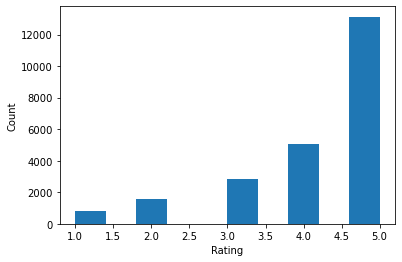

In [11]:
plt.figure()
plt.hist(df1['Rating'])
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

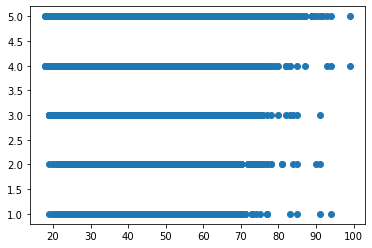

In [12]:
plt.figure()
plt.scatter(df1['Age'], df1['Rating']) #x-carat and y-diamond
plt.show()

In [13]:
df1.corr()

Clothing ID       Age    Rating  Recommended IND  \
Clothing ID                 1.000000  0.017972 -0.018879        -0.016206   
Age                         0.017972  1.000000  0.026831         0.030622   
Rating                     -0.018879  0.026831  1.000000         0.792336   
Recommended IND            -0.016206  0.030622  0.792336         1.000000   
Positive Feedback Count     0.046356  0.043079 -0.064961        -0.069045   

                         Positive Feedback Count  
Clothing ID                             0.046356  
Age                                     0.043079  
Rating                                 -0.064961  
Recommended IND                        -0.069045  
Positive Feedback Count                 1.000000

In [14]:
import seaborn as sns

sns.set_style('whitegrid')

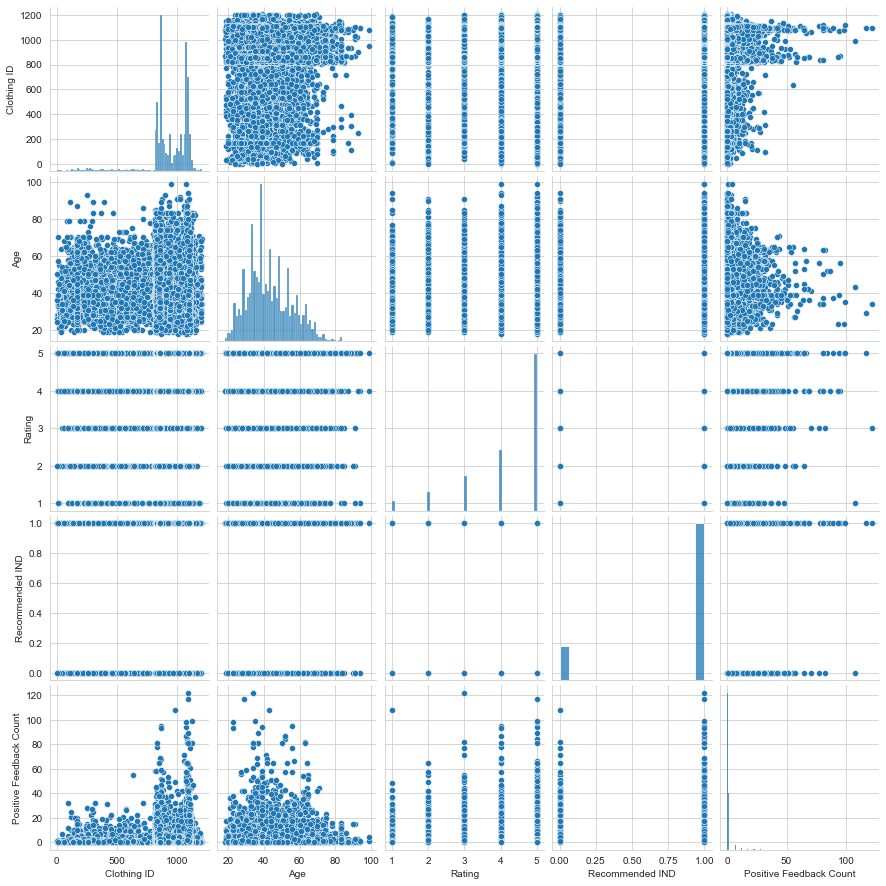

In [15]:
sns.pairplot(df1)
plt.show()

from sklearn.feature_extraction.text import TfidfVectorizer
corpus=df['Review Text']
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)


In [16]:
# df1['words'] = df['Review Text'].str.split(expand=True)
df1
# print(words[:100])

Clothing ID  Age                                              Title  \
0              767   33                                                NaN   
1             1080   34                                                NaN   
2             1077   60                            Some major design flaws   
3             1049   50                                   My favorite buy!   
4              847   47                                   Flattering shirt   
...            ...  ...                                                ...   
23481         1104   34                     Great dress for many occasions   
23482          862   48                         Wish it was made of cotton   
23483         1104   31                              Cute, but see through   
23484         1084   28  Very cute dress, perfect for summer parties an...   
23485         1104   52                    Please make more like this one!   

                                             Review Text  Rating  \
0      Absolutely wonderful - silky and sexy and comf...       4   
1      Love this dress!  it's sooo pretty.  i happene...       5   
2      I had such high hopes for this dress and reall...       3   
3      I love, love, love this jumpsuit. it's fun, fl...       5   
4      This shirt is very flattering to all due to th...       5   
...                                                  ...     ...   
23481  I was very happy to snag this dress at such a ...       5   
23482  It reminds me of maternity clothes. soft, stre...       3   
23483  This fit well, but the top was very see throug...       3   
23484  I bought this dress for a wedding i have this ...       3   
23485  This dress in a lovely platinum is feminine an...       5   

       Recommended IND  Positive Feedback Count   Division Name  \
0                    1                        0       Initmates   
1                    1                        4         General   
2                    0                        0         General   
3                    1                        0  General Petite   
4                    1                        6         General   
...                ...                      ...             ...   
23481                1                        0  General Petite   
23482                1                        0  General Petite   
23483                0                        1  General Petite   
23484                1                        2         General   
23485                1                       22  General Petite   

      Department Name Class Name  
0            Intimate  Intimates  
1             Dresses    Dresses  
2             Dresses    Dresses  
3             Bottoms      Pants  
4                Tops    Blouses  
...               ...        ...  
23481         Dresses    Dresses  
23482            Tops      Knits  
23483         Dresses    Dresses  
23484         Dresses    Dresses  
23485         Dresses    Dresses  

[23486 rows x 10 columns]

In [17]:
df1['Review Text'].str.rsplit(expand=True,)

0          1       2      3           4          5        6    \
0      Absolutely  wonderful       -  silky         and       sexy      and   
1            Love       this  dress!   it's        sooo    pretty.        i   
2               I        had    such   high       hopes        for     this   
3               I      love,   love,   love        this  jumpsuit.     it's   
4            This      shirt      is   very  flattering         to      all   
...           ...        ...     ...    ...         ...        ...      ...   
23481           I        was    very  happy          to       snag     this   
23482          It    reminds      me     of   maternity   clothes.    soft,   
23483        This        fit   well,    but         the        top      was   
23484           I     bought    this  dress         for          a  wedding   
23485        This      dress      in      a      lovely   platinum       is   

               7        8          9    ...   105   106   107   108   109  \
0      comfortable     None       None  ...  None  None  None  None  None   
1         happened       to       find  ...  None  None  None  None  None   
2            dress      and     really  ...  None  None  None  None  None   
3             fun,  flirty,        and  ...  None  None  None  None  None   
4              due       to        the  ...  None  None  None  None  None   
...            ...      ...        ...  ...   ...   ...   ...   ...   ...   
23481        dress       at       such  ...  None  None  None  None  None   
23482    stretchy,    shiny  material.  ...  None  None  None  None  None   
23483         very      see   through.  ...  None  None  None  None  None   
23484            i     have       this  ...  None  None  None  None  None   
23485     feminine      and       fits  ...  None  None  None  None  None   

        110   111   112   113   114  
0      None  None  None  None  None  
1      None  None  None  None  None  
2      None  None  None  None  None  
3      None  None  None  None  None  
4      None  None  None  None  None  
...     ...   ...   ...   ...   ...  
23481  None  None  None  None  None  
23482  None  None  None  None  None  
23483  None  None  None  None  None  
23484  None  None  None  None  None  
23485  None  None  None  None  None  

[23486 rows x 115 columns]

In [18]:
df1

Clothing ID  Age                                              Title  \
0              767   33                                                NaN   
1             1080   34                                                NaN   
2             1077   60                            Some major design flaws   
3             1049   50                                   My favorite buy!   
4              847   47                                   Flattering shirt   
...            ...  ...                                                ...   
23481         1104   34                     Great dress for many occasions   
23482          862   48                         Wish it was made of cotton   
23483         1104   31                              Cute, but see through   
23484         1084   28  Very cute dress, perfect for summer parties an...   
23485         1104   52                    Please make more like this one!   

                                             Review Text  Rating  \
0      Absolutely wonderful - silky and sexy and comf...       4   
1      Love this dress!  it's sooo pretty.  i happene...       5   
2      I had such high hopes for this dress and reall...       3   
3      I love, love, love this jumpsuit. it's fun, fl...       5   
4      This shirt is very flattering to all due to th...       5   
...                                                  ...     ...   
23481  I was very happy to snag this dress at such a ...       5   
23482  It reminds me of maternity clothes. soft, stre...       3   
23483  This fit well, but the top was very see throug...       3   
23484  I bought this dress for a wedding i have this ...       3   
23485  This dress in a lovely platinum is feminine an...       5   

       Recommended IND  Positive Feedback Count   Division Name  \
0                    1                        0       Initmates   
1                    1                        4         General   
2                    0                        0         General   
3                    1                        0  General Petite   
4                    1                        6         General   
...                ...                      ...             ...   
23481                1                        0  General Petite   
23482                1                        0  General Petite   
23483                0                        1  General Petite   
23484                1                        2         General   
23485                1                       22  General Petite   

      Department Name Class Name  
0            Intimate  Intimates  
1             Dresses    Dresses  
2             Dresses    Dresses  
3             Bottoms      Pants  
4                Tops    Blouses  
...               ...        ...  
23481         Dresses    Dresses  
23482            Tops      Knits  
23483         Dresses    Dresses  
23484         Dresses    Dresses  
23485         Dresses    Dresses  

[23486 rows x 10 columns]

In [19]:
import nltk
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ayotolaosibogun/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
# Import stopwords with nltk.
from nltk.corpus import stopwords
stop = stopwords.words('english')


In [21]:
#test

In [22]:
df1['words']=df1['Review Text'].str.rsplit()
df1['words'] = df1['words'].astype(str)
df1['words']=df1['words'].str.lower()
df1

Clothing ID  Age                                              Title  \
0              767   33                                                NaN   
1             1080   34                                                NaN   
2             1077   60                            Some major design flaws   
3             1049   50                                   My favorite buy!   
4              847   47                                   Flattering shirt   
...            ...  ...                                                ...   
23481         1104   34                     Great dress for many occasions   
23482          862   48                         Wish it was made of cotton   
23483         1104   31                              Cute, but see through   
23484         1084   28  Very cute dress, perfect for summer parties an...   
23485         1104   52                    Please make more like this one!   

                                             Review Text  Rating  \
0      Absolutely wonderful - silky and sexy and comf...       4   
1      Love this dress!  it's sooo pretty.  i happene...       5   
2      I had such high hopes for this dress and reall...       3   
3      I love, love, love this jumpsuit. it's fun, fl...       5   
4      This shirt is very flattering to all due to th...       5   
...                                                  ...     ...   
23481  I was very happy to snag this dress at such a ...       5   
23482  It reminds me of maternity clothes. soft, stre...       3   
23483  This fit well, but the top was very see throug...       3   
23484  I bought this dress for a wedding i have this ...       3   
23485  This dress in a lovely platinum is feminine an...       5   

       Recommended IND  Positive Feedback Count   Division Name  \
0                    1                        0       Initmates   
1                    1                        4         General   
2                    0                        0         General   
3                    1                        0  General Petite   
4                    1                        6         General   
...                ...                      ...             ...   
23481                1                        0  General Petite   
23482                1                        0  General Petite   
23483                0                        1  General Petite   
23484                1                        2         General   
23485                1                       22  General Petite   

      Department Name Class Name  \
0            Intimate  Intimates   
1             Dresses    Dresses   
2             Dresses    Dresses   
3             Bottoms      Pants   
4                Tops    Blouses   
...               ...        ...   
23481         Dresses    Dresses   
23482            Tops      Knits   
23483         Dresses    Dresses   
23484         Dresses    Dresses   
23485         Dresses    Dresses   

                                                   words  
0      ['absolutely', 'wonderful', '-', 'silky', 'and...  
1      ['love', 'this', 'dress!', "it's", 'sooo', 'pr...  
2      ['i', 'had', 'such', 'high', 'hopes', 'for', '...  
3      ['i', 'love,', 'love,', 'love', 'this', 'jumps...  
4      ['this', 'shirt', 'is', 'very', 'flattering', ...  
...                                                  ...  
23481  ['i', 'was', 'very', 'happy', 'to', 'snag', 't...  
23482  ['it', 'reminds', 'me', 'of', 'maternity', 'cl...  
23483  ['this', 'fit', 'well,', 'but', 'the', 'top', ...  
23484  ['i', 'bought', 'this', 'dress', 'for', 'a', '...  
23485  ['this', 'dress', 'in', 'a', 'lovely', 'platin...  

[23486 rows x 11 columns]

In [23]:

# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
df1['words'] = df1['words'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

df1

Clothing ID  Age                                              Title  \
0              767   33                                                NaN   
1             1080   34                                                NaN   
2             1077   60                            Some major design flaws   
3             1049   50                                   My favorite buy!   
4              847   47                                   Flattering shirt   
...            ...  ...                                                ...   
23481         1104   34                     Great dress for many occasions   
23482          862   48                         Wish it was made of cotton   
23483         1104   31                              Cute, but see through   
23484         1084   28  Very cute dress, perfect for summer parties an...   
23485         1104   52                    Please make more like this one!   

                                             Review Text  Rating  \
0      Absolutely wonderful - silky and sexy and comf...       4   
1      Love this dress!  it's sooo pretty.  i happene...       5   
2      I had such high hopes for this dress and reall...       3   
3      I love, love, love this jumpsuit. it's fun, fl...       5   
4      This shirt is very flattering to all due to th...       5   
...                                                  ...     ...   
23481  I was very happy to snag this dress at such a ...       5   
23482  It reminds me of maternity clothes. soft, stre...       3   
23483  This fit well, but the top was very see throug...       3   
23484  I bought this dress for a wedding i have this ...       3   
23485  This dress in a lovely platinum is feminine an...       5   

       Recommended IND  Positive Feedback Count   Division Name  \
0                    1                        0       Initmates   
1                    1                        4         General   
2                    0                        0         General   
3                    1                        0  General Petite   
4                    1                        6         General   
...                ...                      ...             ...   
23481                1                        0  General Petite   
23482                1                        0  General Petite   
23483                0                        1  General Petite   
23484                1                        2         General   
23485                1                       22  General Petite   

      Department Name Class Name  \
0            Intimate  Intimates   
1             Dresses    Dresses   
2             Dresses    Dresses   
3             Bottoms      Pants   
4                Tops    Blouses   
...               ...        ...   
23481         Dresses    Dresses   
23482            Tops      Knits   
23483         Dresses    Dresses   
23484         Dresses    Dresses   
23485         Dresses    Dresses   

                                                   words  
0      ['absolutely', 'wonderful', '-', 'silky', 'and...  
1      ['love', 'this', 'dress!', "it's", 'sooo', 'pr...  
2      ['i', 'had', 'such', 'high', 'hopes', 'for', '...  
3      ['i', 'love,', 'love,', 'love', 'this', 'jumps...  
4      ['this', 'shirt', 'is', 'very', 'flattering', ...  
...                                                  ...  
23481  ['i', 'was', 'very', 'happy', 'to', 'snag', 't...  
23482  ['it', 'reminds', 'me', 'of', 'maternity', 'cl...  
23483  ['this', 'fit', 'well,', 'but', 'the', 'top', ...  
23484  ['i', 'bought', 'this', 'dress', 'for', 'a', '...  
23485  ['this', 'dress', 'in', 'a', 'lovely', 'platin...  

[23486 rows x 11 columns]

In [24]:
pat = r'\b(?:{})\b'.format('|'.join(stop))
df1['words'] = df1['words'].str.replace(pat, '')
df1['words'] = df1['words'].str.replace(r'\s+', ' ')
df1
# Same results.

Clothing ID  Age                                              Title  \
0              767   33                                                NaN   
1             1080   34                                                NaN   
2             1077   60                            Some major design flaws   
3             1049   50                                   My favorite buy!   
4              847   47                                   Flattering shirt   
...            ...  ...                                                ...   
23481         1104   34                     Great dress for many occasions   
23482          862   48                         Wish it was made of cotton   
23483         1104   31                              Cute, but see through   
23484         1084   28  Very cute dress, perfect for summer parties an...   
23485         1104   52                    Please make more like this one!   

                                             Review Text  Rating  \
0      Absolutely wonderful - silky and sexy and comf...       4   
1      Love this dress!  it's sooo pretty.  i happene...       5   
2      I had such high hopes for this dress and reall...       3   
3      I love, love, love this jumpsuit. it's fun, fl...       5   
4      This shirt is very flattering to all due to th...       5   
...                                                  ...     ...   
23481  I was very happy to snag this dress at such a ...       5   
23482  It reminds me of maternity clothes. soft, stre...       3   
23483  This fit well, but the top was very see throug...       3   
23484  I bought this dress for a wedding i have this ...       3   
23485  This dress in a lovely platinum is feminine an...       5   

       Recommended IND  Positive Feedback Count   Division Name  \
0                    1                        0       Initmates   
1                    1                        4         General   
2                    0                        0         General   
3                    1                        0  General Petite   
4                    1                        6         General   
...                ...                      ...             ...   
23481                1                        0  General Petite   
23482                1                        0  General Petite   
23483                0                        1  General Petite   
23484                1                        2         General   
23485                1                       22  General Petite   

      Department Name Class Name  \
0            Intimate  Intimates   
1             Dresses    Dresses   
2             Dresses    Dresses   
3             Bottoms      Pants   
4                Tops    Blouses   
...               ...        ...   
23481         Dresses    Dresses   
23482            Tops      Knits   
23483         Dresses    Dresses   
23484         Dresses    Dresses   
23485         Dresses    Dresses   

                                                   words  
0      ['absolutely', 'wonderful', '-', 'silky', '', ...  
1      ['love', '', 'dress!', "'", 'sooo', 'pretty.',...  
2      ['', '', '', 'high', 'hopes', '', '', 'dress',...  
3      ['', 'love,', 'love,', 'love', '', 'jumpsuit.'...  
4      ['', 'shirt', '', '', 'flattering', '', '', 'd...  
...                                                  ...  
23481  ['', '', '', 'happy', '', 'snag', '', 'dress',...  
23482  ['', 'reminds', '', '', 'maternity', 'clothes....  
23483  ['', 'fit', 'well,', '', '', 'top', '', '', 's...  
23484  ['', 'bought', '', 'dress', '', '', 'wedding',...  
23485  ['', 'dress', '', '', 'lovely', 'platinum', ''...  

[23486 rows x 11 columns]

In [25]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [26]:
df1['words'] = df1['words'].apply(lambda x:''.join([stemmer.stem(y) for y in x])) # Stem every word.
# df = df.drop(columns=['unstemmed']) # Get rid of the unstemmed column.
df1 # Print dataframe.

Clothing ID  Age                                              Title  \
0              767   33                                                NaN   
1             1080   34                                                NaN   
2             1077   60                            Some major design flaws   
3             1049   50                                   My favorite buy!   
4              847   47                                   Flattering shirt   
...            ...  ...                                                ...   
23481         1104   34                     Great dress for many occasions   
23482          862   48                         Wish it was made of cotton   
23483         1104   31                              Cute, but see through   
23484         1084   28  Very cute dress, perfect for summer parties an...   
23485         1104   52                    Please make more like this one!   

                                             Review Text  Rating  \
0      Absolutely wonderful - silky and sexy and comf...       4   
1      Love this dress!  it's sooo pretty.  i happene...       5   
2      I had such high hopes for this dress and reall...       3   
3      I love, love, love this jumpsuit. it's fun, fl...       5   
4      This shirt is very flattering to all due to th...       5   
...                                                  ...     ...   
23481  I was very happy to snag this dress at such a ...       5   
23482  It reminds me of maternity clothes. soft, stre...       3   
23483  This fit well, but the top was very see throug...       3   
23484  I bought this dress for a wedding i have this ...       3   
23485  This dress in a lovely platinum is feminine an...       5   

       Recommended IND  Positive Feedback Count   Division Name  \
0                    1                        0       Initmates   
1                    1                        4         General   
2                    0                        0         General   
3                    1                        0  General Petite   
4                    1                        6         General   
...                ...                      ...             ...   
23481                1                        0  General Petite   
23482                1                        0  General Petite   
23483                0                        1  General Petite   
23484                1                        2         General   
23485                1                       22  General Petite   

      Department Name Class Name  \
0            Intimate  Intimates   
1             Dresses    Dresses   
2             Dresses    Dresses   
3             Bottoms      Pants   
4                Tops    Blouses   
...               ...        ...   
23481         Dresses    Dresses   
23482            Tops      Knits   
23483         Dresses    Dresses   
23484         Dresses    Dresses   
23485         Dresses    Dresses   

                                                   words  
0      ['absolutely', 'wonderful', '-', 'silky', '', ...  
1      ['love', '', 'dress!', "'", 'sooo', 'pretty.',...  
2      ['', '', '', 'high', 'hopes', '', '', 'dress',...  
3      ['', 'love,', 'love,', 'love', '', 'jumpsuit.'...  
4      ['', 'shirt', '', '', 'flattering', '', '', 'd...  
...                                                  ...  
23481  ['', '', '', 'happy', '', 'snag', '', 'dress',...  
23482  ['', 'reminds', '', '', 'maternity', 'clothes....  
23483  ['', 'fit', 'well,', '', '', 'top', '', '', 's...  
23484  ['', 'bought', '', 'dress', '', '', 'wedding',...  
23485  ['', 'dress', '', '', 'lovely', 'platinum', ''...  

[23486 rows x 11 columns]

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(encoding='utf-8',lowercase=True)
x = vectorizer.fit_transform(df1['words'])
vectorizer.get_feature_names()

['00',
 '000',
 '00p',
 '02',
 '03',
 '03dd',
 '04',
 '06',
 '0dd',
 '0in',
 '0p',
 '0petite',
 '0r',
 '0verall',
 '0xs',
 '10',
 '100',
 '1000',
 '100lb',
 '100lbs',
 '101',
 '102',
 '102lbs',
 '103',
 '103lb',
 '103lbs',
 '104',
 '104lbs',
 '105',
 '105lb',
 '105lbs',
 '106',
 '106lbs',
 '107',
 '107lb',
 '107lbs',
 '107pound',
 '108',
 '108lbs',
 '109',
 '109lbs',
 '10l',
 '10lbs',
 '10mths',
 '10p',
 '10s',
 '10th',
 '10x',
 '11',
 '110',
 '110lb',
 '110lbs',
 '111',
 '111lbs',
 '112',
 '112lb',
 '112lbs',
 '112llbs',
 '113',
 '113lbs',
 '114',
 '114lb',
 '114lbs',
 '115',
 '115ish',
 '115lb',
 '115lbs',
 '115llbs',
 '116',
 '116bs',
 '116ibs',
 '116lb',
 '116lbs',
 '117',
 '117bl',
 '117lbs',
 '118',
 '118lb',
 '118lbs',
 '119',
 '11and',
 '11in',
 '11inches',
 '12',
 '120',
 '120lb',
 '120lbs',
 '121',
 '122',
 '122lb',
 '122lbs',
 '123',
 '123lb',
 '123lbs',
 '123lbssize',
 '124',
 '124lb',
 '124lbs',
 '125',
 '125b',
 '125ibs',
 '125ish',
 '125lb',
 '125lbs',
 '126',
 '126lbs',

In [66]:
df1['vector'] = []

for x in 


Exception: Data must be 1-dimensional

In [29]:
df1['Review Text'].str.rsplit(expand=True,)

0          1       2      3           4          5        6    \
0      Absolutely  wonderful       -  silky         and       sexy      and   
1            Love       this  dress!   it's        sooo    pretty.        i   
2               I        had    such   high       hopes        for     this   
3               I      love,   love,   love        this  jumpsuit.     it's   
4            This      shirt      is   very  flattering         to      all   
...           ...        ...     ...    ...         ...        ...      ...   
23481           I        was    very  happy          to       snag     this   
23482          It    reminds      me     of   maternity   clothes.    soft,   
23483        This        fit   well,    but         the        top      was   
23484           I     bought    this  dress         for          a  wedding   
23485        This      dress      in      a      lovely   platinum       is   

               7        8          9    ...   105   106   107   108   109  \
0      comfortable     None       None  ...  None  None  None  None  None   
1         happened       to       find  ...  None  None  None  None  None   
2            dress      and     really  ...  None  None  None  None  None   
3             fun,  flirty,        and  ...  None  None  None  None  None   
4              due       to        the  ...  None  None  None  None  None   
...            ...      ...        ...  ...   ...   ...   ...   ...   ...   
23481        dress       at       such  ...  None  None  None  None  None   
23482    stretchy,    shiny  material.  ...  None  None  None  None  None   
23483         very      see   through.  ...  None  None  None  None  None   
23484            i     have       this  ...  None  None  None  None  None   
23485     feminine      and       fits  ...  None  None  None  None  None   

        110   111   112   113   114  
0      None  None  None  None  None  
1      None  None  None  None  None  
2      None  None  None  None  None  
3      None  None  None  None  None  
4      None  None  None  None  None  
...     ...   ...   ...   ...   ...  
23481  None  None  None  None  None  
23482  None  None  None  None  None  
23483  None  None  None  None  None  
23484  None  None  None  None  None  
23485  None  None  None  None  None  

[23486 rows x 115 columns]

In [60]:
x.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [30]:
df3 = pd.DataFrame(x.toarray(),columns= vectorizer.get_feature_names())
df3

00  000  00p   02   03  03dd   04   06  0dd  0in  ...  zippie  \
0      0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...     0.0   
1      0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...     0.0   
2      0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...     0.0   
3      0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...     0.0   
4      0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...     0.0   
...    ...  ...  ...  ...  ...   ...  ...  ...  ...  ...  ...     ...   
23481  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...     0.0   
23482  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...     0.0   
23483  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...     0.0   
23484  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...     0.0   
23485  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...     0.0   

       zipping  zips  zombie  zone  zoolander  zoom  zooming  zuma  ã¼ber  
0          0.0   0.0     0.0   0.0        0.0   0.0      0.0   0.0    0.0  
1          0.0   0.0     0.0   0.0        0.0   0.0      0.0   0.0    0.0  
2          0.0   0.0     0.0   0.0        0.0   0.0      0.0   0.0    0.0  
3          0.0   0.0     0.0   0.0        0.0   0.0      0.0   0.0    0.0  
4          0.0   0.0     0.0   0.0        0.0   0.0      0.0   0.0    0.0  
...        ...   ...     ...   ...        ...   ...      ...   ...    ...  
23481      0.0   0.0     0.0   0.0        0.0   0.0      0.0   0.0    0.0  
23482      0.0   0.0     0.0   0.0        0.0   0.0      0.0   0.0    0.0  
23483      0.0   0.0     0.0   0.0        0.0   0.0      0.0   0.0    0.0  
23484      0.0   0.0     0.0   0.0        0.0   0.0      0.0   0.0    0.0  
23485      0.0   0.0     0.0   0.0        0.0   0.0      0.0   0.0    0.0  

[23486 rows x 14006 columns]

In [31]:
import statistics 

In [32]:
for column in df3.columns:
    y= df3[df3.column > 0][column]
    x= statistics.stdev(y)
#     x= y.mean()
    if x> 0.0 and x<=0.05:
        
#         print(f"column name:{column}, X_mean:{x}, x>value:{x>0.05}")
          print(f"column name:{column}, X_stdev:{x}, x>value:{x<0.05}")
    

column name:back, X_stdev:0.04121972513963101, x>value:True
column name:beautiful, X_stdev:0.04830673551566132, x>value:True
column name:color, X_stdev:0.035546923105557994, x>value:True
column name:column, X_stdev:0.012841139306722977, x>value:True
column name:fabric, X_stdev:0.037595352782593724, x>value:True
column name:fit, X_stdev:0.032080656213189555, x>value:True
column name:good, X_stdev:0.04731445580557728, x>value:True
column name:large, X_stdev:0.04491627153145961, x>value:True
column name:length, X_stdev:0.04507507714917952, x>value:True
column name:look, X_stdev:0.045951509734043, x>value:True
column name:material, X_stdev:0.04435820218896604, x>value:True
column name:much, X_stdev:0.04706034822615515, x>value:True
column name:ordered, X_stdev:0.04217490510904135, x>value:True
column name:petite, X_stdev:0.045486764098820485, x>value:True
column name:pretty, X_stdev:0.04737309242342875, x>value:True
column name:quality, X_stdev:0.04876627022539517, x>value:True
column name

In [33]:
df_columns = []

for column in df3.columns:
    y= df3[df3.column > 0][column]
    x= statistics.stdev(y)
#     x= y.mean()
    if x> 0.0 and x<=0.05:
          
            df_columns.append(column)

df_columns

# filter out columns that are not needed or reduce the columns

['back',
 'beautiful',
 'color',
 'column',
 'fabric',
 'fit',
 'good',
 'large',
 'length',
 'look',
 'material',
 'much',
 'ordered',
 'petite',
 'pretty',
 'quality',
 'really',
 'size',
 'top',
 'well']

In [34]:
df4 = df3[df_columns]
df4

back  beautiful     color  column    fabric       fit  good  large  \
0       0.0        0.0  0.000000     0.0  0.000000  0.000000   0.0    0.0   
1       0.0        0.0  0.000000     0.0  0.000000  0.000000   0.0    0.0   
2       0.0        0.0  0.000000     0.0  0.000000  0.055858   0.0    0.0   
3       0.0        0.0  0.000000     0.0  0.000000  0.000000   0.0    0.0   
4       0.0        0.0  0.000000     0.0  0.000000  0.000000   0.0    0.0   
...     ...        ...       ...     ...       ...       ...   ...    ...   
23481   0.0        0.0  0.191235     0.0  0.000000  0.000000   0.0    0.0   
23482   0.0        0.0  0.000000     0.0  0.000000  0.000000   0.0    0.0   
23483   0.0        0.0  0.000000     0.0  0.169343  0.144503   0.0    0.0   
23484   0.0        0.0  0.000000     0.0  0.000000  0.079903   0.0    0.0   
23485   0.0        0.0  0.000000     0.0  0.000000  0.000000   0.0    0.0   

         length  look  material      much   ordered    petite    pretty  \
0      0.000000   0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
1      0.117644   0.0  0.000000  0.000000  0.104614  0.379835  0.123642   
2      0.000000   0.0  0.000000  0.000000  0.069792  0.168933  0.000000   
3      0.000000   0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
4      0.178400   0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
...         ...   ...       ...       ...       ...       ...       ...   
23481  0.000000   0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
23482  0.000000   0.0  0.136706  0.000000  0.000000  0.000000  0.000000   
23483  0.000000   0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
23484  0.000000   0.0  0.000000  0.111399  0.000000  0.000000  0.000000   
23485  0.000000   0.0  0.000000  0.000000  0.000000  0.000000  0.000000   

       quality    really      size       top      well  
0          0.0  0.000000  0.000000  0.000000  0.000000  
1          0.0  0.000000  0.000000  0.000000  0.000000  
2          0.0  0.070372  0.054383  0.059515  0.000000  
3          0.0  0.000000  0.000000  0.000000  0.000000  
4          0.0  0.000000  0.000000  0.000000  0.165530  
...        ...       ...       ...       ...       ...  
23481      0.0  0.000000  0.000000  0.000000  0.000000  
23482      0.0  0.000000  0.000000  0.000000  0.000000  
23483      0.0  0.000000  0.000000  0.153964  0.188388  
23484      0.0  0.000000  0.000000  0.000000  0.000000  
23485      0.0  0.000000  0.000000  0.000000  0.000000  

[23486 rows x 20 columns]

In [31]:
df4 = df3[['back','beautiful','color','column','fabric','fit','good','large','length','look','material','much','ordered'
          ,'petite','pretty','quality','really','size','top','well']]
df4

back  beautiful     color  column    fabric       fit  good  large  \
0       0.0        0.0  0.000000     0.0  0.000000  0.000000   0.0    0.0   
1       0.0        0.0  0.000000     0.0  0.000000  0.000000   0.0    0.0   
2       0.0        0.0  0.000000     0.0  0.000000  0.055858   0.0    0.0   
3       0.0        0.0  0.000000     0.0  0.000000  0.000000   0.0    0.0   
4       0.0        0.0  0.000000     0.0  0.000000  0.000000   0.0    0.0   
...     ...        ...       ...     ...       ...       ...   ...    ...   
23481   0.0        0.0  0.191235     0.0  0.000000  0.000000   0.0    0.0   
23482   0.0        0.0  0.000000     0.0  0.000000  0.000000   0.0    0.0   
23483   0.0        0.0  0.000000     0.0  0.169343  0.144503   0.0    0.0   
23484   0.0        0.0  0.000000     0.0  0.000000  0.079903   0.0    0.0   
23485   0.0        0.0  0.000000     0.0  0.000000  0.000000   0.0    0.0   

         length  look  material      much   ordered    petite    pretty  \
0      0.000000   0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
1      0.117644   0.0  0.000000  0.000000  0.104614  0.379835  0.123642   
2      0.000000   0.0  0.000000  0.000000  0.069792  0.168933  0.000000   
3      0.000000   0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
4      0.178400   0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
...         ...   ...       ...       ...       ...       ...       ...   
23481  0.000000   0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
23482  0.000000   0.0  0.136706  0.000000  0.000000  0.000000  0.000000   
23483  0.000000   0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
23484  0.000000   0.0  0.000000  0.111399  0.000000  0.000000  0.000000   
23485  0.000000   0.0  0.000000  0.000000  0.000000  0.000000  0.000000   

       quality    really      size       top      well  
0          0.0  0.000000  0.000000  0.000000  0.000000  
1          0.0  0.000000  0.000000  0.000000  0.000000  
2          0.0  0.070372  0.054383  0.059515  0.000000  
3          0.0  0.000000  0.000000  0.000000  0.000000  
4          0.0  0.000000  0.000000  0.000000  0.165530  
...        ...       ...       ...       ...       ...  
23481      0.0  0.000000  0.000000  0.000000  0.000000  
23482      0.0  0.000000  0.000000  0.000000  0.000000  
23483      0.0  0.000000  0.000000  0.153964  0.188388  
23484      0.0  0.000000  0.000000  0.000000  0.000000  
23485      0.0  0.000000  0.000000  0.000000  0.000000  

[23486 rows x 20 columns]

In [35]:
res = pd.concat([df1, df4], axis=1)
# res.describe()
res.head(5)

Clothing ID  Age                    Title  \
0          767   33                      NaN   
1         1080   34                      NaN   
2         1077   60  Some major design flaws   
3         1049   50         My favorite buy!   
4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  ...  \
0                        0       Initmates        Intimate  Intimates  ...   
1                        4         General         Dresses    Dresses  ...   
2                        0         General         Dresses    Dresses  ...   
3                        0  General Petite         Bottoms      Pants  ...   
4                        6         General            Tops    Blouses  ...   

  material  much   ordered    petite    pretty  quality    really      size  \
0      0.0   0.0  0.000000  0.000000  0.000000      0.0  0.000000  0.000000   
1      0.0   0.0  0.104614  0.379835  0.123642      0.0  0.000000  0.000000   
2      0.0   0.0  0.069792  0.168933  0.000000      0.0  0.070372  0.054383   
3      0.0   0.0  0.000000  0.000000  0.000000      0.0  0.000000  0.000000   
4      0.0   0.0  0.000000  0.000000  0.000000      0.0  0.000000  0.000000   

        top     well  
0  0.000000  0.00000  
1  0.000000  0.00000  
2  0.059515  0.00000  
3  0.000000  0.00000  
4  0.000000  0.16553  

[5 rows x 31 columns]

In [33]:
len(res)

23486

In [34]:
res['beautiful']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
23481    0.0
23482    0.0
23483    0.0
23484    0.0
23485    0.0
Name: beautiful, Length: 23486, dtype: float64

In [35]:
res['pretty']

0        0.000000
1        0.123642
2        0.000000
3        0.000000
4        0.000000
           ...   
23481    0.000000
23482    0.000000
23483    0.000000
23484    0.000000
23485    0.000000
Name: pretty, Length: 23486, dtype: float64

In [36]:
res.loc[:1,]

Clothing ID  Age Title                                        Review Text  \
0          767   33   NaN  Absolutely wonderful - silky and sexy and comf...   
1         1080   34   NaN  Love this dress!  it's sooo pretty.  i happene...   

   Rating  Recommended IND  Positive Feedback Count Division Name  \
0       4                1                        0     Initmates   
1       5                1                        4       General   

  Department Name Class Name  ... material  much   ordered    petite  \
0        Intimate  Intimates  ...      0.0   0.0  0.000000  0.000000   
1         Dresses    Dresses  ...      0.0   0.0  0.104614  0.379835   

     pretty  quality  really  size  top  well  
0  0.000000      0.0     0.0   0.0  0.0   0.0  
1  0.123642      0.0     0.0   0.0  0.0   0.0  

[2 rows x 31 columns]

In [37]:
res_df = res[['Clothing ID', 'Age','Title', 'Review Text', 'Rating', 'beautiful']]
res_df[res_df['beautiful']>0]

Clothing ID  Age                               Title  \
29               4   28                Great layering piece   
41             862   40                                 NaN   
49             862   33                Love the embroidery!   
60            1095   41                     Gorgeous dress!   
65             862   58                                 NaN   
...            ...  ...                                 ...   
23425          430   23                                 NaN   
23426          854   27  Love love love...just really sheer   
23427          854   42                         Sheer shirt   
23464         1104   42                         Compliments   
23477         1094   39                          Entrancing   

                                             Review Text  Rating  beautiful  
29     This sweater is so comfy and classic - it bala...       5   0.097821  
41     This is a beautiful top. it's unique and not s...       5   0.150201  
49     Really cute top! the embroidery on the collar ...       5   0.128920  
60     This dress is simply beautiful and stunning. i...       5   0.277233  
65     Beautiful top, but delicate! i wore it to scho...       4   0.226032  
...                                                  ...     ...        ...  
23425  A great long line bra! beautiful and well made...       4   0.091330  
23426  Absolutely love this shirt - the embroidery on...       4   0.133523  
23427  What drew me to this shirt was the beautiful s...       2   0.077453  
23464  I wore this dress to work the other day and go...       5   0.180894  
23477  I'm so impressed with the beautiful color comb...       4   0.078059  

[2776 rows x 6 columns]

In [38]:
#test

In [39]:
#bucket the reviews? by count? 

In [36]:
res.corr()

Clothing ID       Age    Rating  Recommended IND  \
Clothing ID                 1.000000  0.017972 -0.018879        -0.016206   
Age                         0.017972  1.000000  0.026831         0.030622   
Rating                     -0.018879  0.026831  1.000000         0.792336   
Recommended IND            -0.016206  0.030622  0.792336         1.000000   
Positive Feedback Count     0.046356  0.043079 -0.064961        -0.069045   
back                       -0.006116  0.022332 -0.134235        -0.134516   
beautiful                   0.039291  0.010052  0.038149         0.025703   
color                       0.013018  0.030644  0.033177         0.030765   
column                     -0.004999  0.008546  0.000224         0.006060   
fabric                      0.034819  0.043192 -0.093970        -0.087627   
fit                         0.036583 -0.003503  0.018899         0.007535   
good                       -0.016654  0.013078 -0.023354        -0.009429   
large                      -0.001808  0.026825 -0.039739        -0.007159   
length                      0.029187  0.016030  0.047066         0.045776   
look                        0.018688  0.006277 -0.056323        -0.062764   
material                    0.006181 -0.028959 -0.073019        -0.071574   
much                        0.017521 -0.004398 -0.068934        -0.077510   
ordered                     0.006255  0.026517 -0.052927        -0.030982   
petite                      0.078860 -0.005691  0.008620         0.020744   
pretty                     -0.017218  0.006219 -0.030420        -0.008517   
quality                    -0.012073 -0.008513 -0.034199        -0.039327   
really                     -0.001844 -0.027651 -0.055560        -0.039016   
size                        0.026651  0.016699  0.044177         0.065687   
top                        -0.126152  0.011358 -0.027247        -0.028213   
well                       -0.000740 -0.003819  0.052568         0.046119   

                         Positive Feedback Count      back  beautiful  \
Clothing ID                             0.046356 -0.006116   0.039291   
Age                                     0.043079  0.022332   0.010052   
Rating                                 -0.064961 -0.134235   0.038149   
Recommended IND                        -0.069045 -0.134516   0.025703   
Positive Feedback Count                 1.000000  0.032026   0.003146   
back                                    0.032026  1.000000  -0.001686   
beautiful                               0.003146 -0.001686   1.000000   
color                                  -0.007975 -0.009096   0.071859   
column                                 -0.000192  0.001475   0.006454   
fabric                                  0.026963  0.021442   0.036742   
fit                                     0.012255 -0.024150  -0.004787   
good                                   -0.007152  0.008663  -0.011923   
large                                   0.008888 -0.003961   0.014648   
length                                  0.019260 -0.006878  -0.008472   
look                                    0.016650  0.018515  -0.030324   
material                                0.002563  0.012829   0.007249   
much                                    0.017509  0.025912  -0.000582   
ordered                                 0.000143  0.019359   0.007847   
petite                                  0.027374 -0.012585  -0.008790   
pretty                                 -0.000441  0.010168  -0.018955   
quality                                -0.003199 -0.008741   0.019761   
really                                  0.014537  0.024951  -0.003236   
size                                    0.032089 -0.017941   0.014118   
top                                     0.014625  0.032910   0.021559   
well                                   -0.015191 -0.011223   0.032450   

                            color    column    fabric  ...  material  \
Clothing ID              0.013018 -0.004999  0.0348

In [41]:
# # sns.pairplot(res)
# plt.show()

In [37]:
len(res.columns)

31

In [38]:
res['text ln']= res['Review Text'].str.split().str.len()
res #to add the length of words in review

Clothing ID  Age                                              Title  \
0              767   33                                                NaN   
1             1080   34                                                NaN   
2             1077   60                            Some major design flaws   
3             1049   50                                   My favorite buy!   
4              847   47                                   Flattering shirt   
...            ...  ...                                                ...   
23481         1104   34                     Great dress for many occasions   
23482          862   48                         Wish it was made of cotton   
23483         1104   31                              Cute, but see through   
23484         1084   28  Very cute dress, perfect for summer parties an...   
23485         1104   52                    Please make more like this one!   

                                             Review Text  Rating  \
0      Absolutely wonderful - silky and sexy and comf...       4   
1      Love this dress!  it's sooo pretty.  i happene...       5   
2      I had such high hopes for this dress and reall...       3   
3      I love, love, love this jumpsuit. it's fun, fl...       5   
4      This shirt is very flattering to all due to th...       5   
...                                                  ...     ...   
23481  I was very happy to snag this dress at such a ...       5   
23482  It reminds me of maternity clothes. soft, stre...       3   
23483  This fit well, but the top was very see throug...       3   
23484  I bought this dress for a wedding i have this ...       3   
23485  This dress in a lovely platinum is feminine an...       5   

       Recommended IND  Positive Feedback Count   Division Name  \
0                    1                        0       Initmates   
1                    1                        4         General   
2                    0                        0         General   
3                    1                        0  General Petite   
4                    1                        6         General   
...                ...                      ...             ...   
23481                1                        0  General Petite   
23482                1                        0  General Petite   
23483                0                        1  General Petite   
23484                1                        2         General   
23485                1                       22  General Petite   

      Department Name Class Name  ...      much   ordered    petite    pretty  \
0            Intimate  Intimates  ...  0.000000  0.000000  0.000000  0.000000   
1             Dresses    Dresses  ...  0.000000  0.104614  0.379835  0.123642   
2             Dresses    Dresses  ...  0.000000  0.069792  0.168933  0.000000   
3             Bottoms      Pants  ...  0.000000  0.000000  0.000000  0.000000   
4                Tops    Blouses  ...  0.000000  0.000000  0.000000  0.000000   
...               ...        ...  ...       ...       ...       ...       ...   
23481         Dresses    Dresses  ...  0.000000  0.000000  0.000000  0.000000   
23482            Tops      Knits  ...  0.000000  0.000000  0.000000  0.000000   
23483         Dresses    Dresses  ...  0.000000  0.000000  0.000000  0.000000   
23484         Dresses    Dresses  ...  0.111399  0.000000  0.000000  0.000000   
23485         Dresses    Dresses  ...  0.000000  0.000000  0.000000  0.000000   

       quality    really      size       top      well  text ln  
0          0.0  0.000000  0.000000  0.000000  0.000000      8.0  
1          0.0  0.000000  0.000000  0.000000  0.000000     62.0  
2          0.0  0.070372  0.054383  0.059515  0.000000     98.0  
3          0.0  0.000000  0.000000  0.000000  0.000000     22.0  
4          0.0  0.000000  0.000000  0.000000  0.165530     36.0  
...        ...       ...       ...       ...       ...      ...  
23481      0.

In [39]:
# Import the formula tools
import statsmodels.formula.api as smf

#Create a model that could help predict Rating (y value)


In [40]:
res.columns

Index(['Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name', 'words', 'back', 'beautiful', 'color',
       'column', 'fabric', 'fit', 'good', 'large', 'length', 'look',
       'material', 'much', 'ordered', 'petite', 'pretty', 'quality', 'really',
       'size', 'top', 'well', 'text ln'],
      dtype='object')

In [41]:
res.rename(columns={'Clothing ID':'Clothing_ID','Review Text':'Review_Text', 'Recommended IND': 'Recommended_IND', 'Positive Feedback Count': 'Positive_Feedback_Count',
                   'Division Name': 'Division_Name', 'Department Name': 'Department_Name', 'Class Name': 'Class_Name','text ln':'text_ln'}, inplace=True)

In [42]:
from sklearn.linear_model import LinearRegression

In [50]:
x = res[['Age', 'Title', 'Review_Text',
       'Recommended_IND', 'Positive_Feedback_Count', 'Division_Name',
       'Department_Name', 'Class_Name', 'words', 'back', 'beautiful', 'color',
       'column', 'fabric', 'fit', 'good', 'large', 'length', 'look',
       'material', 'much', 'ordered', 'petite', 'pretty', 'quality', 'really',
       'size', 'top', 'well', 'text_ln']]
y=res['Rating']

In [ ]:
# res_2 = smf.ols("Rating ~ Age + Title + Positive_Feedback_Count + Division_Name + Department_Name + Class_Name + words + back + beautiful + color + column + fabric + fit + good + large + length + look + material + much + ordered + petite + pretty + quality + really + size + top + well + text_ln", data=res).fit() 
# res_2.summary() 
# too long to run

In [44]:
import statsmodels.formula.api as smf

In [52]:
res_2 = smf.ols("Rating ~ Age + Positive_Feedback_Count + back + beautiful + color + column + fabric + fit + good + large + length + look + material + much + ordered + petite + pretty + quality + really + size + top + well + text_ln", data=res).fit()
res_2.summary() 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     63.72
Date:                Mon, 31 Oct 2022   Prob (F-statistic):          2.32e-286
Time:                        15:48:06   Log-Likelihood:                -33895.
No. Observations:               22641   AIC:                         6.784e+04
Df Residuals:                   22617   BIC:                         6.803e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   4.2600      0.032    135.184      0.000       4.198       4.322
Age                         0.0032      0.001      5.422      0.000       0.002       0.004
Positive_Feedback_Count    -0.0100      0.001     -7.863      0.000      -0.012      -0.007
back                       -2.9889      0.161    -18.545      0.000      -3.305      -2.673
beautiful                   0.8213      0.143      5.758      0.000       0.542       1.101
color                       0.7647      0.141      5.410      0.000       0.488       1.042
column                      0.4715      2.101      0.224      0.822      -3.647       4.590
fabric                     -2.0645      0.148    -13.911      0.000      -2.355      -1.774
fit                         0.3520      0.138      2.543      0.011       0.081       0.623
good                       -0.2316      0.170     -1.365      0.172      -0.564       0.101
large                      -0.8725      0.147     -5.939      0.000      -1.160      -0.585
length                      1.2394      0.163      7.583      0.000       0.919       1.560
look                       -0.9956      0.154     -6.455      0.000      -1.298      -0.693
material                   -1.7029      0.154    -11.047      0.000      -2.005      -1.401
much                       -1.2691      0.167     -7.586      0.000      -1.597      -0.941
ordered                    -1.3686      0.158     -8.638      0.000      -1.679      -1.058
petite                      0.2202      0.161      1.368      0.171      -0.095       0.536
pretty                     -0.5734      0.158     -3.623      0.000      -0.884      -0.263
quality                    -0.6637      0.163     -4.075      0.000      -0.983      -0.344
really                     -0.9223      0.145     -6.345      0.000      -1.207      -0.637
size                        1.0651      0.125      8.490      0.000       0.819       1.311
top                        -0.1780      0.110     -1.620      0.105      -0.393       0.037
well                        1.2309      0.149      8.266      0.000       0.939       1.523
text_ln                    -0.0012      0.000     -4.453      0.000      -0.002      -0.001
==============================================================================
Omnibus:                     3970.843   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6408.372
Skew:                          -1.230   Prob(JB):                         0.00
Kurtosis:                       3.861   Cond. No.                     2.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number 

In [51]:
res['words'].head()

0    ['absolutely', 'wonderful', '-', 'silky', '', ...
1    ['love', '', 'dress!', "'", 'sooo', 'pretty.',...
2    ['', '', '', 'high', 'hopes', '', '', 'dress',...
3    ['', 'love,', 'love,', 'love', '', 'jumpsuit.'...
4    ['', 'shirt', '', '', 'flattering', '', '', 'd...
Name: words, dtype: object